## Dimensionality reduction

### Principal component analysis (PCA)

In [13]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asadullahgalib/guava-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/asadullahgalib/guava-disease-dataset/versions/6


In [17]:
import os
import pandas as pd

# Load the dataset
data_file = os.path.join(path, "dataset_summary.csv")
data = pd.read_csv(data_file)

In [18]:
# Preprocessing

# Drop non-numeric columns or encode them if necessary
numerical_data = data.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


In [27]:
# Perform PCA
pca = PCA(n_components=1)  # Reduce to 1 component
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(
    data=principal_components, columns=['Principal Component 1']
)

if 'label' in data.columns:
    pca_df['Label'] = data['label']


<ipython-input-26-261e222f64ef>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


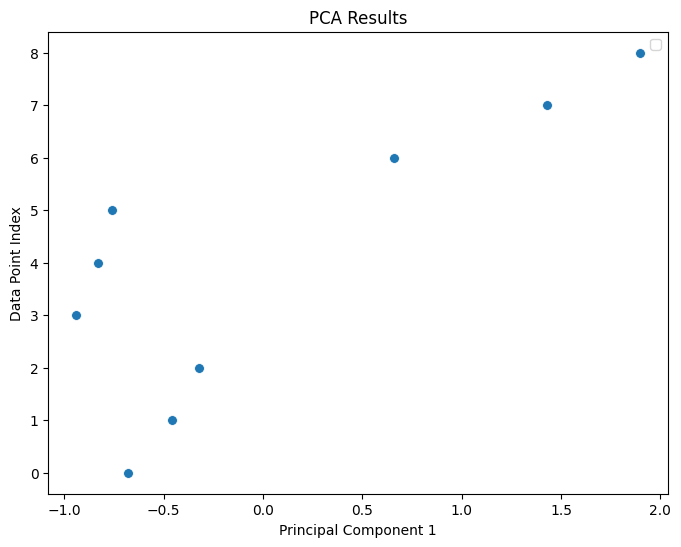

In [26]:
# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Principal Component 1',
    y=pca_df.index, # Use index as y-axis since we only have 1 component
    hue='Label' if 'Label' in pca_df.columns else None,
    data=pca_df,
    palette='viridis',
    s=50
)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Data Point Index') # Adjust y-axis label
plt.legend()
plt.show()

### Least Discriminat Analysis

In [34]:
# Import necessary libraries
import kagglehub
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Download the dataset using kagglehub
path = kagglehub.dataset_download("asadullahgalib/guava-disease-dataset")
print("Path to dataset files:", path)

# Set dataset paths
train_dir = os.path.join(path, "GuavaDiseaseDataset/GuavaDiseaseDataset/train")

Path to dataset files: /root/.cache/kagglehub/datasets/asadullahgalib/guava-disease-dataset/versions/6


In [36]:
# Load a pre-trained model (ResNet50) for feature extraction
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Preprocess and load images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2647 images belonging to 3 classes.


In [37]:
# Step 1: Extract features from images
features = resnet_model.predict(train_generator)
labels = train_generator.classes  # Class labels (Anthracnose, Fruit Flies, Healthy fruits)

83/83 ━━━━━━━━━━━━━━━━━━━━ 517s 6s/step


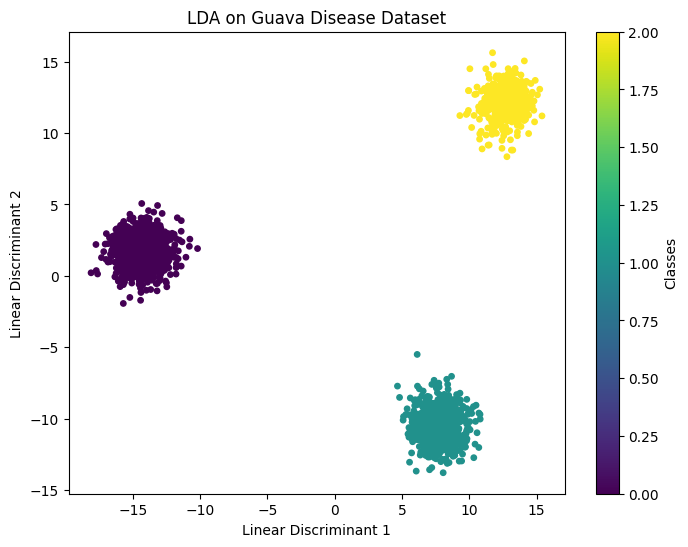

In [38]:
# Step 2: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components for visualization
lda_result = lda.fit_transform(features, labels)

# Step 7: Visualize LDA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(lda_result[:, 0], lda_result[:, 1], c=labels, cmap='viridis', s=15)
plt.colorbar(scatter, label='Classes')
plt.title('LDA on Guava Disease Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()
